## June 24 2016 
Quick notes sensitivity of our results to error in estimate of TF size.  Most of our calibration regarding the atom number is based on a correct estimate of the TF size on the detector.  We are trying to resolve several discrepancies between our measured results and expected.  

One possible reason that we estimate the size is due to the fluctuations in the center of the cloud on the MCP.  Note that we do our best to compensate for this by re-centering each individual shot.  However, there is always an error associated with finding the center, and this will typically broaden out our distribution a bit.  Qualitatively, we see that the cloud edge is less sharp than a perfect TF distribution.  This smoothness is consistent with a residual fluctuation of the center on the order of 10%.

Here I'll make some scaling arguments to see how other quantities behave if we allow some variation in the TF width.  I define

$$\frac{R_{true}}{R_{measured}}\equiv \epsilon$$

### Atom number
$$R(t)\approx R(t=0)\omega t$$
$$R(t)\propto N^{1/5}$$

$$\frac{N_2}{N_1}=\left(\frac{R(t)_2}{R(t)_1}\right)^5=\epsilon^5$$

### In-trap density at center
$$n=\frac{\mu}{U_{int}}$$
$$n\propto N^{2/5}$$

$$\frac{n_2}{n_1}=\left(\frac{N_2}{N_1}\right)^5=\epsilon^2$$

### Transition temperature
$$T_{c}\approx 0.94\hbar\omega N^{1/3}$$
$$T_{c}\propto N^{1/3}$$

$$\frac{T_{c,2}}{T_{c,1}}=\left(\frac{N_2}{N_1}\right)^{1/3}=\epsilon^{5/3}$$

### Two-body contact parameter
$$C_2/N=\frac{8}{7\pi}a_s^2n$$
$$C_2/N=\propto n$$

$$\frac{C_{2,2}}{C_{2,1}}=\left(\frac{n_2}{n_1}\right)=\epsilon^{2}$$

### Let's plot some of this

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

In [2]:
epsilon=1+np.arange(-0.21,0.21,1e-2)
RN=epsilon**5
RTc=epsilon**(5./3)
Rn=epsilon**2
RC=epsilon**2

<function matplotlib.pyplot.show>

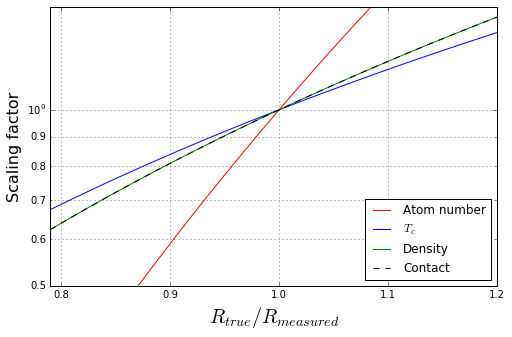

In [3]:
fig=plt.figure(figsize=(8,5))
plt.plot(epsilon,RN,color="red",label="Atom number")
plt.plot(epsilon,RTc,color="blue",label="$T_c$")
plt.plot(epsilon,Rn,color="green",label="Density")
plt.plot(epsilon,RC,color="black",linestyle='--',label="Contact")
ax=plt.gca()
ax.set_yscale('log')
plt.xlim([np.min(epsilon),np.max(epsilon)])
plt.ylim([0.5,1.5])

plt.legend(loc=4)
plt.xlabel('$R_{true}/R_{measured}$',fontsize=20)
plt.ylabel('Scaling factor',fontsize=16)

plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
plt.grid(True, which="both")
plt.show

Each quantity -- atom number, transition temperature, peak density and Contact -- scale positively with the cloud size.  If we think that fluctuations are broadening our cloud size ($\epsilon<1$), all these other quantities must also go down.  

This *could* be favourable for the condensate transition (we observe a $T_c$ about 20% too large).  However note that the atom number falls rapidly, so the condensate fraction will also decrease.  I'm not yet sure which one should win out.

However the expected contact would also decrease, increasing the discrepancy with that measured, and this is the real problem we are trying to resolve.

Perhaps if we suppose that the size is actually larger ($\epsilon>1$).  Here, if we suppose $\epsilon=1.2$, we find the contact increase by roughly a factor of 2.  Still pretty far from expected.